# Anti Money Laundering (AML) Fraud Detection


        Life cycle of Machine Learning Project:

            1. Understanding the Problem Statement

            2. Data Collection

            3. Data Checks to perform

            4. Exploratory Data Analysis

            5. Data Pre-Processing

            6. Model Evaluation and Training

            7. Choose Best Model


## 1. Problem Statement

Money laundering is a multi-billion dollar issue. Detection of laundering is very difficult. Most automated algorithms have a high false positive rate: legitimate transactions incorrectly flagged as laundering. The converse is also a major problem -- false negatives, i.e. undetected laundering transactions. Naturally, criminals work hard to cover their tracks.

Access to real financial transaction data is highly restricted -- for both proprietary and privacy reasons. Even when access is possible, it is problematic to provide a correct tag (laundering or legitimate) to each transaction -- as noted above. This synthetic transaction data from IBM avoids these problems.

The data provided here is based on a virtual world inhabited by individuals, companies, and banks.

## 2. Data Collection
- Data source: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/data

### 2.1 Import Required Packages

In [293]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

### 2.2 Import Data

In [294]:
import os
# Get the current working directory
cwd = os.getcwd()
print(cwd)

# Navigate to the data folder
data_folder = os.path.abspath(os.path.join(cwd, "data"))
print(data_folder)

csv_file = os.path.join(data_folder, "HI-Small_Trans.csv")
print(csv_file)

c:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\01 - MLOps\AML-Fraud-Detection\notebook
c:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\01 - MLOps\AML-Fraud-Detection\notebook\data
c:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\01 - MLOps\AML-Fraud-Detection\notebook\data\HI-Small_Trans.csv


In [295]:
# Load the CSV file into a pandas DataFrame
aml_trans_df = pd.read_csv(csv_file)
# display(aml_trans_df.head())
print(f"Shape of data:  \n No. of records: {aml_trans_df.shape[0]} \n No. features: {aml_trans_df.shape[1]}")

Shape of data:  
 No. of records: 5078345 
 No. features: 11


In [296]:
# Take small sample of data from the original data
aml_trans_sm_df = aml_trans_df.sample(n=50000, random_state=6)
print(f"Shape of data:  \n No. of records: {aml_trans_sm_df.shape[0]} \n No. features: {aml_trans_sm_df.shape[1]}")

Shape of data:  
 No. of records: 50000 
 No. features: 11


#### Show Top 5 records

In [297]:
aml_trans_sm_df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3507139,2022/09/07 12:15,29,80CF063F0,235843,80CFE1EB0,386006.86,Brazil Real,386006.86,Brazil Real,Cheque,0
2054082,2022/09/03 21:15,70,100428660,22732,80BFEBFF0,8638.95,US Dollar,8638.95,US Dollar,Cheque,0
4745576,2022/09/09 19:22,338871,8144F97F0,15964,8144FEB20,80.84,Euro,80.84,Euro,Credit Card,0
1999193,2022/09/03 14:11,70,1004286A8,1502,812191060,46480.59,Euro,46480.59,Euro,Cheque,0
800550,2022/09/01 14:46,1,803A2CC10,130342,80C982930,118.46,US Dollar,118.46,US Dollar,Cheque,0


### 2.2 Dataset Information

- `Timestamp` - Year/Month/Day Hour/Minute
- `From Bank` - Numeric code for bank where transaction originates
- `Account` - Hexadecimal code for account where transaction originates
- `To Bank` - Numeric code for bank where transaction ends
- `Account.1` - Hexadecimal code for account where transaction ends
- `Amount Received` - Monetary amount received in From account (in currency units of the next column)
- `Receiving Currency` - Currency such as dollars, euros, etc of From account
- `Amount Paid` - Monetary amount paid (in currency units of the next column)
- `Payment Currency` - Currency such as dollars, euros, etc of From account
- `Payement Format` - How transaction was conducted, e.g. cheque, ACH, wire, credit cards, etc.
- `Is Laundering` - Target variable

## 3 Data Checks to perform
- Check Duplicates
- Check Missing Values
- Check Data Types
- Check the number of unique values of each column
- Check Statitics of Data
- Check various categories present in the different column

### 3.1 Check Duplicates

In [298]:
aml_trans_sm_df.duplicated(keep="first").sum()

0

### 3.2 Check Missing values

In [299]:
aml_trans_sm_df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

### 3.3 Check Data Types

In [300]:
aml_trans_sm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 3507139 to 3159372
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           50000 non-null  object 
 1   From Bank           50000 non-null  int64  
 2   Account             50000 non-null  object 
 3   To Bank             50000 non-null  int64  
 4   Account.1           50000 non-null  object 
 5   Amount Received     50000 non-null  float64
 6   Receiving Currency  50000 non-null  object 
 7   Amount Paid         50000 non-null  float64
 8   Payment Currency    50000 non-null  object 
 9   Payment Format      50000 non-null  object 
 10  Is Laundering       50000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.6+ MB


### 3.4 Checking the number of unique values of each column

In [301]:
aml_trans_sm_df.nunique()

Timestamp             13022
From Bank              3494
Account               37420
To Bank                2161
Account.1             44258
Amount Received       44567
Receiving Currency       15
Amount Paid           44618
Payment Currency         15
Payment Format            7
Is Laundering             2
dtype: int64

### 3.5 Check Statistics of the Data set

In [302]:
# Statistics of the Numerical columns
aml_trans_sm_df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
From Bank,50000.0,4.634242e+04,8.244610e+04,1.000000,124.0000,10232.000,28694.0000,3.562190e+05
To Bank,50000.0,6.604474e+04,8.441844e+04,1.000000,4503.0000,21575.000,122352.0000,3.562190e+05
Amount Received,50000.0,1.598001e+07,2.129876e+09,0.000001,183.6175,1387.060,12332.7175,4.536185e+11
Amount Paid,50000.0,1.551440e+07,2.129498e+09,0.000001,184.4375,1391.025,12292.8175,4.536185e+11
Is Laundering,50000.0,1.080000e-03,3.284593e-02,0.000000,0.0000,0.000,0.0000,1.000000e+00


In [303]:
# Statistics of the Categorical columns
aml_trans_sm_df.describe(include=np.object_).T

,count,unique,top,freq
Timestamp,50000,13022,2022/09/01 00:00,126
Account,50000,37420,100428660,1633
Account.1,50000,44258,100428660,18
Receiving Currency,50000,15,US Dollar,18577
Payment Currency,50000,15,US Dollar,18732
Payment Format,50000,7,Cheque,18194


In [304]:
pd.to_datetime(aml_trans_sm_df["Timestamp"]).describe()

count                         50000
mean     2022-09-05 07:06:18.866400
min             2022-09-01 00:00:00
25%             2022-09-02 03:50:00
50%             2022-09-05 12:16:00
75%             2022-09-08 03:16:00
max             2022-09-14 13:27:00
Name: Timestamp, dtype: object

In [305]:
aml_trans_sm_df.head(2)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3507139,2022/09/07 12:15,29,80CF063F0,235843,80CFE1EB0,386006.86,Brazil Real,386006.86,Brazil Real,Cheque,0
2054082,2022/09/03 21:15,70,100428660,22732,80BFEBFF0,8638.95,US Dollar,8638.95,US Dollar,Cheque,0


## 4. Exploring Data (Visualization)

### 4.1 

Is Laundering
0    49946
1       54
Name: count, dtype: int64


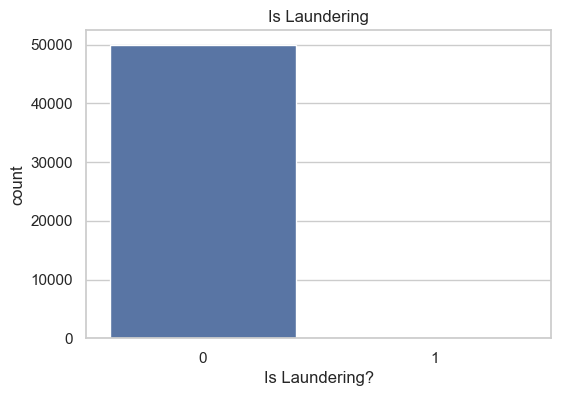

In [306]:
# Exploring the target variable "Is Laundering"
print(aml_trans_sm_df["Is Laundering"].value_counts(dropna=False))

# Bar plot
plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
ax = sns.countplot(x="Is Laundering", data=aml_trans_sm_df)
plt.title("Is Laundering")
plt.xlabel("Is Laundering?")
plt.show()

In [307]:
aml_trans_sm_df.head(2)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3507139,2022/09/07 12:15,29,80CF063F0,235843,80CFE1EB0,386006.86,Brazil Real,386006.86,Brazil Real,Cheque,0
2054082,2022/09/03 21:15,70,100428660,22732,80BFEBFF0,8638.95,US Dollar,8638.95,US Dollar,Cheque,0


In [308]:
# Dropping some columns based on domain knowledge
aml_trans_sm_df.drop(columns=["Timestamp", "Amount Paid", "Payment Currency"], inplace=True)
aml_trans_sm_df.head(2)

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Payment Format,Is Laundering
3507139,29,80CF063F0,235843,80CFE1EB0,386006.86,Brazil Real,Cheque,0
2054082,70,100428660,22732,80BFEBFF0,8638.95,US Dollar,Cheque,0


In [309]:
# Get the list of numerical columns name
numeric_cols = aml_trans_sm_df.select_dtypes(include=np.number).columns
numeric_cols

Index(['From Bank', 'To Bank', 'Amount Received', 'Is Laundering'], dtype='object')

In [310]:
# Get the list of categorical columns name
category_cols = aml_trans_sm_df.select_dtypes(include=object).columns
category_cols

Index(['Account', 'Account.1', 'Receiving Currency', 'Payment Format'], dtype='object')

# 5. Model Training

####  Independent features and Dependent variable

In [311]:
# Dividing into Independent and Dependent features
X = aml_trans_sm_df.drop(columns=["Is Laundering"], axis=1)
y = aml_trans_sm_df["Is Laundering"]

In [312]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)
categorical_features = X.select_dtypes(include=object).columns.tolist()
print(categorical_features)

['From Bank', 'To Bank', 'Amount Received']
['Account', 'Account.1', 'Receiving Currency', 'Payment Format']


#### Defining Pipeline

In [313]:
""" 
    - Preprocessing datasets for modeling
    - Imputing, Scaling and encoding  
"""
def num_cat_transformer(num_type, cat_object_type):
    # Preprocessing for numerical features:
    num_transformer = make_pipeline(SimpleImputer(strategy='median'),
                                    RobustScaler())

    # Preprocessing for categorical features:
    cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

    ## Transforming both numerical and catergorical columns based preprocessing above
    column_transformer = make_column_transformer((num_transformer, numerical_features),
                                                 (cat_transformer, categorical_features),
                                                 remainder="passthrough")
    return column_transformer

#### Train and Test dataset split

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Applying the column transformer to both Train and Test

In [315]:
column_transformer_tn = num_cat_transformer(numerical_features, categorical_features)
X_train = column_transformer_tn.fit_transform(X_train)
print("Encoded and Scaled of the Train dataset ")
display(pd.DataFrame(X_train).head())

X_test = column_transformer_tn.transform(X_test)
print("Encoded and Scaled of the Test dataset ")
display(pd.DataFrame(X_test).head())

Encoded and Scaled of the Train dataset 


,0,1,2,3,4,5,6
0,12.006860,1.981475,-0.113073,30792.0,35477.0,1.0,1.0
1,0.662969,0.864077,7.321705,22354.0,26319.0,12.0,0.0
2,4.667693,1.889222,0.061059,28169.0,31072.0,9.0,3.0
3,0.231617,-0.034063,8.689518,15524.0,11943.0,6.0,3.0
4,-0.344731,0.027249,0.501891,19608.0,16414.0,3.0,4.0


Encoded and Scaled of the Test dataset 


,0,1,2,3,4,5,6
0,0.828299,0.103183,1.227359,-1.0,-1.0,12.0,0.0
1,0.652154,0.853563,-0.099347,-1.0,-1.0,12.0,2.0
2,-0.349631,-0.072226,1.500295,1.0,-1.0,4.0,4.0
3,-0.351766,-0.182953,0.567904,-1.0,-1.0,6.0,2.0
4,-0.287229,-0.032578,-0.105046,-1.0,-1.0,12.0,3.0


#### Training Base Model

In [316]:
# Initialize the XGBClassifier
xgb_base = XGBClassifier(eval_metric='logloss')

# Train the model on the training data
xgb_base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [317]:
# Predict the labels for the test set
y_pred = xgb_base.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [318]:
xgb_base.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)>

Probabilities prediction of 'Is Laundering':
 [6.5056674e-02 9.9523393e-05 1.0300636e-02 ... 1.5804537e-02 1.7664891e-02
 1.6894971e-04]


<Figure size 400x400 with 0 Axes>

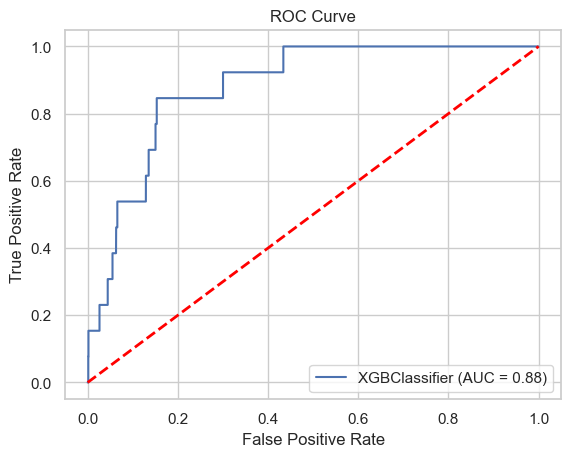

In [319]:
# Predict the probabilities for the test set
test_probabilities = xgb_base.predict_proba(X_test)[:, 1]
print(f"Probabilities prediction of 'Is Laundering':\n {test_probabilities}")

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(4,4))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBClassifier').plot()
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.show()

Closet threshold to get Desired TPR of around 88.0%: 0.0017690184758976102
False Positive Rate (FPR): 0.153
True Positive Rate (TPR): 0.846


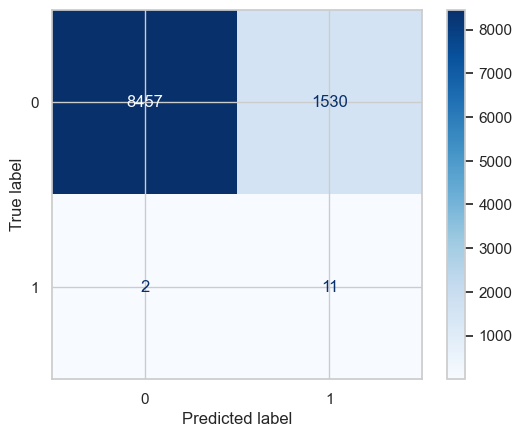

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      9987
           1       0.01      0.85      0.01        13

    accuracy                           0.85     10000
   macro avg       0.50      0.85      0.47     10000
weighted avg       1.00      0.85      0.92     10000



In [320]:
# Compute the True Positive Rate (tPR) and False Positive Rate (FPR) for a specific threshold value
desired_tpr = 0.88
closest_threshold = thresholds[np.argmin(np.abs(tpr - desired_tpr))]
print(f"Closet threshold to get Desired TPR of around {desired_tpr*100}%: {closest_threshold}")

y_pred = (test_probabilities >= closest_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fpr_cm = fp / (fp + tn)
tpr_cm = tp / (tp + fn)
print(f"False Positive Rate (FPR): {fpr_cm:.3f}")
print(f"True Positive Rate (TPR): {tpr_cm:.3f}")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

print(f"Classification report: \n {classification_report(y_test, y_pred)}")

#### Oversamplig the data and cross validating by using different models


In [321]:
"""  Imbalance dataset - upsampling """
def upsampling_data(X, y):
    sm = SMOTE(sampling_strategy='auto', random_state=42)
    X_sm, y_sm = sm.fit_resample(X, y)   
    print(f"\n====== Upsampled the minority class data ======") 
    print("Before SMOTE: ", Counter(y))
    print("After SMOTE: ", Counter(y_sm))
    return X_sm, y_sm


""" Evaluating Models """
def model_evaluation(model, X, y, num_procs):
    # parallel cross-validate models
    print("\n===================== Beginning cross validation ========================== ")
    # Define cross-validation method
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # Define metrics
    metrics = {
        'Precision': make_scorer(precision_score, average='weighted'),
        'Recall': make_scorer(recall_score, average='weighted'),
        'F1 score': make_scorer(f1_score, average='weighted')
    }
    # Perform cross-validation and evaluate using different metrics
    metrics_results = {}
    for name, metric in metrics.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=metric).mean()
        metrics_results[name] = scores
    return metrics_results


""" Calculate Metrics """
def model_metrics(y_test, y_pred):    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred) 
    return precision, recall, f1, cm

##### Models evaluation 


Model: 
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

====== Upsampled the minority class data ======
Before SMOTE:  Counter({0: 39959, 1: 41})
After SMOTE:  Counter({0: 39959, 1: 39959})

===================== Beginning cross validation ========================== 
==== Model evalu

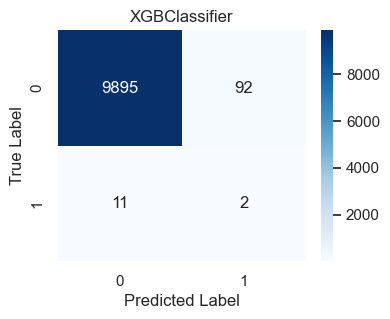



Model: 
 RandomForestClassifier(random_state=42)

====== Upsampled the minority class data ======
Before SMOTE:  Counter({0: 39959, 1: 41})
After SMOTE:  Counter({0: 39959, 1: 39959})

===================== Beginning cross validation ========================== 
==== Model evaluation results on train data via cross-validation ====
Precision --> 0.9988758565067697
Recall --> 0.9988738582156177
F1 score --> 0.9988738567725998

==== Model evaluation results on test data ====
Precision --> 0.9973990881763528
Recall --> 0.9967
F1 score --> 0.9970494215455503


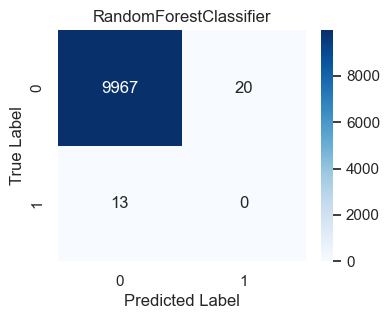



Model: 
 ExtraTreesClassifier(random_state=42)

====== Upsampled the minority class data ======
Before SMOTE:  Counter({0: 39959, 1: 41})
After SMOTE:  Counter({0: 39959, 1: 39959})

===================== Beginning cross validation ========================== 
==== Model evaluation results on train data via cross-validation ====
Precision --> 0.9992754386150781
Recall --> 0.9992742570501925
F1 score --> 0.9992742565167136

==== Model evaluation results on test data ====
Precision --> 0.9973990881763528
Recall --> 0.9967
F1 score --> 0.9970494215455503


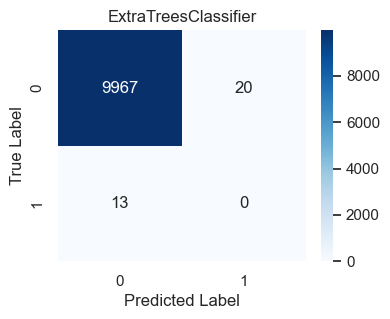



Metrics based on cross validating on Train data:


,Model,Precision,Recall,F1 score
0,XGBClassifier,0.998515,0.998511,0.998511
1,RandomForestClassifier,0.998876,0.998874,0.998874
2,ExtraTreesClassifier,0.999275,0.999274,0.999274



Metrics based on Test data:


,Model,Precision,Recall,F1 score
0,XGBClassifier,0.997619,0.9897,0.993578
1,RandomForestClassifier,0.997399,0.9967,0.997049
2,ExtraTreesClassifier,0.997399,0.9967,0.997049


In [322]:
"""
    Evaluating Models
    - XGBClassifier()
    - RandomForestClassifier()
    - ExtraTreesClassifier()
"""
# intialize the model list and dicts
models = []
mean_score = {}
std_dev = {}


# define number of processes to run in parallel
num_procs = -1

# shared model parameters
verbose_lvl = 0

# Initialize the classifiers
models = {
    'XGBClassifier': XGBClassifier(eval_metric='logloss', random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=100, random_state=42)
}

# Store performance metrics
results_based_Train_data_cv = []
results_based_Test_data = []


for model_name, model in models.items():
    print("\nModel: \n", model)
    # Upsampling train data
    X_train_, y_train_ = upsampling_data(X_train, y_train)

    # Models evaluation on Training Data
    cv_scores = model_evaluation(model, X_train_, y_train_, num_procs)
    temp_dict = {"Model" : model_name}
    temp_dict.update(cv_scores)
    results_based_Train_data_cv.append(temp_dict)
    print("==== Model evaluation results on train data via cross-validation ====")
    for metric_name, scores in cv_scores.items():
        print(f"{metric_name} --> {scores}")
   
    # Models training on Train data 
    model.fit(X_train_, y_train_)

    # Prediction on Test data using trained model
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics on Test data
    precision, recall, f1, cm = model_metrics(y_test, y_pred)
    print("\n==== Model evaluation results on test data ====")
    print(f"Precision --> {precision}")
    print(f"Recall --> {recall}")
    print(f"F1 score --> {f1}")
    # Plot confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"{model_name}")
    plt.show() 

    results_based_Test_data.append({
        "Model" : model_name,
        "Precision" : precision,
        "Recall" : recall,
        "F1 score": f1
    })


    print("==================================================================================\n")

print(f"\nMetrics based on cross validating on Train data:")
display(pd.DataFrame(results_based_Train_data_cv))
print(f"\nMetrics based on Test data:")
display(pd.DataFrame(results_based_Test_data))

#### Choosing the XGBoost Model as our Final Model

In [324]:


# # Upsampling train data
# X_train_, y_train_ = upsampling_data(X_train, y_train)

# # Initialize the XGBClassifier
# xgb_base = XGBClassifier(eval_metric='logloss')
# # Models training on Train data 
# xgb_base.fit(X_train_, y_train_)

# # Prediction on Test data using trained model
# y_pred = xgb_base.predict(X_test)

# # Calculate evaluation metrics on Test data
# precision, recall, f1 = model_metrics(y_test, y_pred)




